# Probabilities as states of information
#### - based on "Lecture Notes on Inverse Theory" by Andreas Fichtner (p.50,51)



## Combining states of information
combining states of information through the conjunction of probability densities $\rho_1(\mathbf{m})$ and $\rho_2(\mathbf{m})$:


$$ (\rho_1 \wedge \rho_2) (\mathbf{m}) = k \frac{\rho_1(\mathbf{m}) \rho_2(\mathbf{m}) }{\rho_h(\mathbf{m}) }$$
- k: normalisation constant
- $\rho_h(m)$: homogeneous (uninformative) probability density  
    - ensures that the conjunction of information $ρ_1$ with the no-information $ρ_h$ does not yield any new information
$$ \rho_1 \wedge \rho_h = \rho_1$$  


In [2]:
# schemtic illustration of the conjunction

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.special as special

from matplotlib import rc
rc('text', usetex=True)

plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 25})

#### What kind of distribution is used below?

- Gaussian distribution

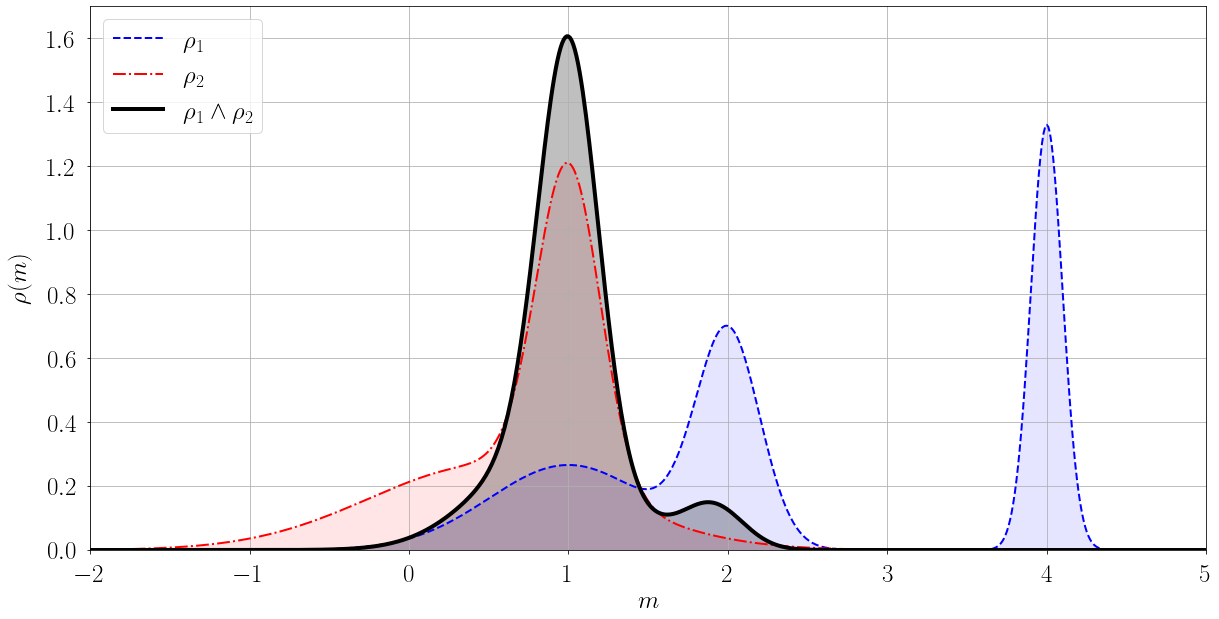

In [4]:
#- Setup. ----------------------------------------------------

plt.subplots(figsize=(20,10))

x=np.arange(-2.0,5.0,0.1)

#- pdf 1. ----------------------------------------------------

x=np.arange(-2.0,5.0,0.01)

sigma=0.5
m0=1.0
y=(1.0/(np.sqrt(2.0*np.pi)*sigma))*np.exp(-(x-m0)**2.0/(2.0*sigma**2))

sigma=0.2
m0=2.0
y+=(1.0/(np.sqrt(2.0*np.pi)*sigma))*np.exp(-(x-m0)**2.0/(2.0*sigma**2))

sigma=0.1
m0=4.0
y+=(1.0/(np.sqrt(2.0*np.pi)*sigma))*np.exp(-(x-m0)**2.0/(2.0*sigma**2))

y1=y/(0.01*sum(y))

plt.fill_between(x,0.0,y1,facecolor='b',alpha=0.1)
plt.plot(x,y1,'--b',linewidth=2,label=r'$\rho_1$')

#- pdf 2. ----------------------------------------------------

sigma=0.75
m0=0.5
y=(1.0/(np.sqrt(2.0*np.pi)*sigma))*np.exp(-(x-m0)**2.0/(2.0*sigma**2))

sigma=0.2
m0=1.0
y+=(1.0/(np.sqrt(2.0*np.pi)*sigma))*np.exp(-(x-m0)**2.0/(2.0*sigma**2))

y2=y/(0.01*sum(y))

plt.fill_between(x,0.0,y2,facecolor='r',alpha=0.1)
plt.plot(x,y2,'-.r',linewidth=2,label=r'$\rho_2$')

#- Conjunction. ----------------------------------------------

y=y1*y2
y=y/(0.01*sum(y))

plt.fill_between(x,0.0,y,facecolor='black',alpha=0.25)
plt.plot(x,y,'k',linewidth=4.0,label=r'$\rho_1 \wedge \rho_2$')

#- Visualisation. --------------------------------------------

plt.legend()

plt.xlim([-2.0,5.0])
plt.ylim([0.0,1.7])
plt.grid()
plt.xlabel(r'$m$')
plt.ylabel(r'$\rho(m)$',labelpad=15)
plt.tick_params(axis='both',which='major',pad=10)

#plt.tight_layout()
#plt.savefig('conjunction.pdf',format='pdf')
plt.show()

## Marginal probability densities

2D model space:
- $\mathbf{m} = (m_1, m_2)$

Probability density
- $\rho(\mathbf{m}) = \rho(m_1, m_2)$

The probability that $m_1$ falls into the interval $[ \tilde{m}_1, \tilde{m}_1 + \Delta m_1]$  (regardless of the location of $m_2$ ) is given by:

$$ P(m_1 \in [\tilde{m}_1, \tilde{m}_1 + \Delta m_1 ], m_2 \, \text{anywhere}) = \int_{m_1 = \tilde{m}_1}^{\tilde{m}_1 + \Delta m_1} \int_{m_2} \rho(m_1,m_2)\,\text{d}m_1\text{d}m_2 = \int_{m_1 = \tilde{m}_1}^{\tilde{m}_1 + \Delta m_1} \rho(m_1)\,\text{d}m_1
$$
#### marginal probability density $\rho(m_1)$:
$$ \rho(m_1) = \int_{m_2} \rho(m_1, m_2) \,\text{d}m_2$$

- contains all information on $m_1$ independent of the information on $m_2$
- can be generalised to higher dimensions by integration over all the model parameters that one is not interested in


D:\Anaconda_Python\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
D:\Anaconda_Python\lib\site-packages\ipykernel_launcher.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 432x288 with 0 Axes>

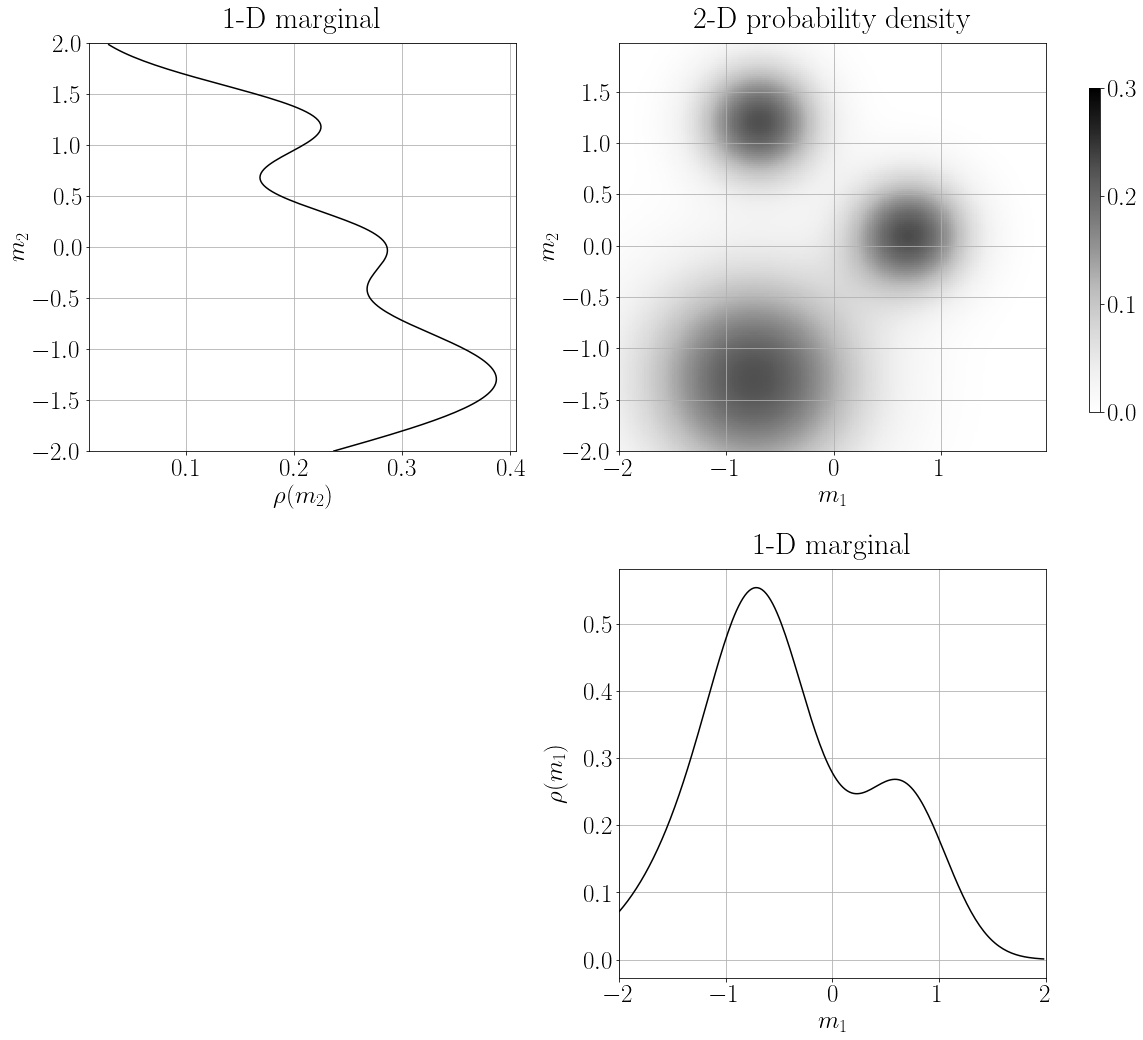

In [5]:
# marginalising a two dimensional probability density

fig=plt.figure()

fig,((ax0,ax1),(ax2,ax3))=plt.subplots(2,2,figsize=(15,15))

#- 2D distribution. ------------------------------------------

x=np.arange(-2.0,2.0,0.02)
y=np.arange(-2.0,2.0,0.02)

x,y=np.meshgrid(x,y)

p=np.exp(-((x-0.7)**2+(y-0.1)**2)/0.3)
p+=np.exp(-((x+0.75)**2+(y+1.3)**2))
p+=np.exp(-((x+0.7)**2+(y-1.2)**2)/0.3)

p=p/(sum(sum(p))*0.02**2)

im=ax1.pcolor(x,y,p,cmap='Greys', vmin=0.0, vmax=0.3)
ax1.set_xlabel(r'$m_1$')
ax1.set_ylabel(r'$m_2$')
ax1.grid()
ax1.set_title('2-D probability density',pad=15)

cbaxes=fig.add_axes([1.01, 0.6, 0.01, 0.3])
plt.colorbar(im,cax=cbaxes,orientation='vertical',ticks=[0.0, 0.1, 0.2, 0.3])


#- m1 marginal. ----------------------------------------------

x=np.arange(-2.0,2.0,0.02)
y=np.sum(p,axis=0)
y=y/(0.02*sum(y))

ax3.plot(x,y,'k')
ax3.set_xlim((-2.0,2.0))

ax3.set_xlabel(r'$m_1$')
ax3.set_ylabel(r'$\rho(m_1)$',labelpad=15)
ax3.grid()
ax3.set_title('1-D marginal',pad=15)

#- m2 marginal. ----------------------------------------------

x=np.arange(-2.0,2.0,0.02)
y=np.sum(p,axis=1)
y=y/(0.02*sum(y))

ax0.plot(y,x,'k')
ax0.set_ylim((-2.0,2.0))

ax0.set_ylabel(r'$m_2$')
ax0.set_xlabel(r'$\rho(m_2)$')
ax0.grid()
ax0.set_title('1-D marginal',pad=15)

#- empty axis ------------------------------------------------

ax2.axis('off')

#- Visualisation. --------------------------------------------

plt.tight_layout()

#plt.savefig('marginal.pdf',format='pdf')
plt.show()